In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt%matplootlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")


In [97]:
import pandas as pd
dp=pd.read_csv("archive.zip")
dp

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [25]:
dp=pd.read_csv("archive.zip")

In [18]:
dp.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [19]:
dp.shape

(2200, 8)

In [20]:
dp.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [21]:
dp.duplicated().sum()

0

In [22]:
dp.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [98]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [27]:
dp.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [28]:
dp.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [29]:
dp['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [30]:
dp['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [35]:
crop_summary = pd.pivot_table(data,index=['label'],aggfunc='mean')

In [36]:
crop_summary

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


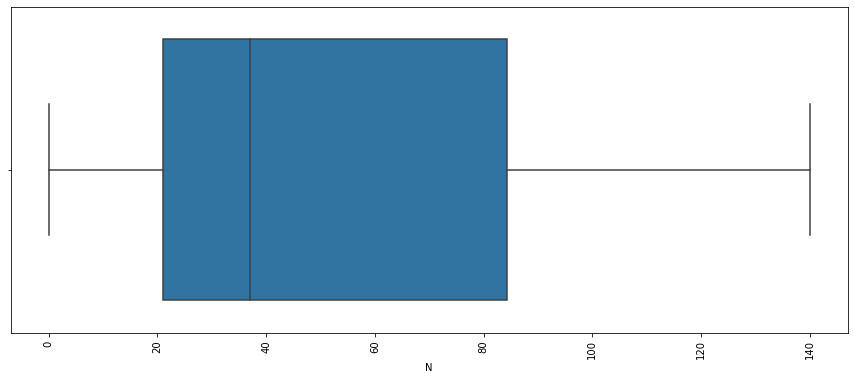

/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


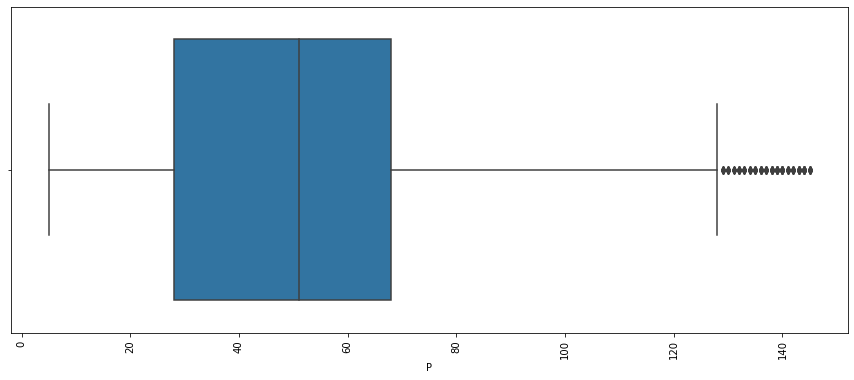

/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


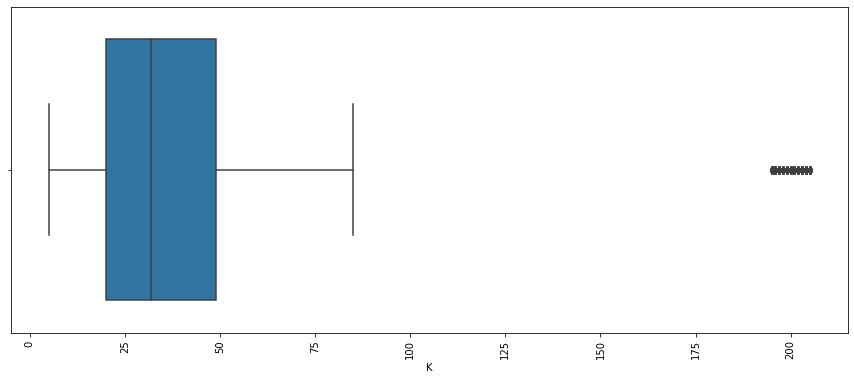

/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


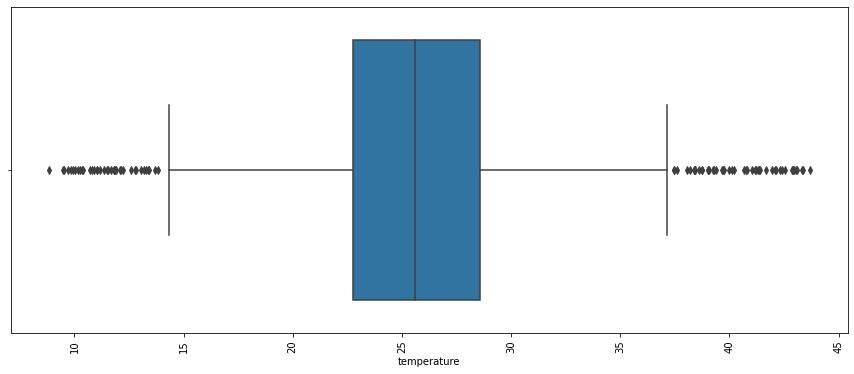

/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


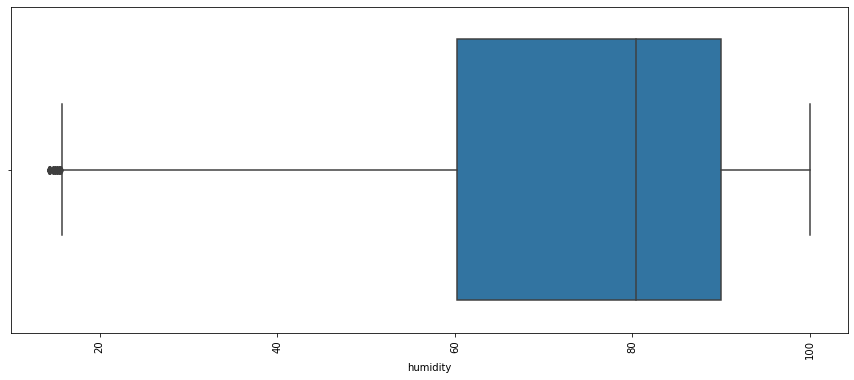

/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


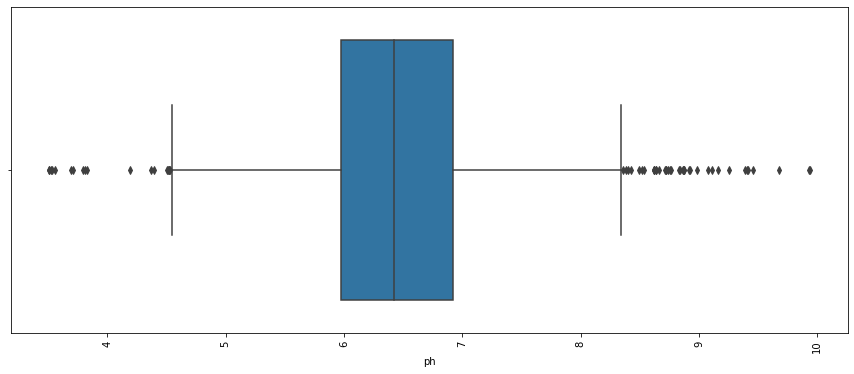

/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


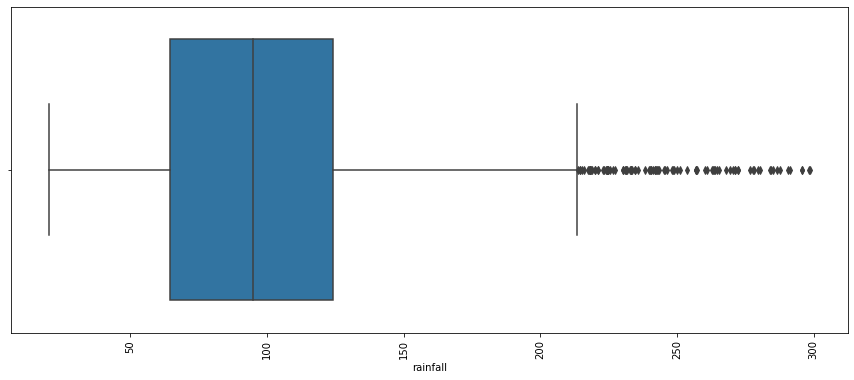

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
dp1 = dp[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
for i in dp1.columns:
                     plt.figure(figsize=(15,6))
                     sns.boxplot(dp1[i])
                     plt.xticks(rotation=90)
                     plt.show()

In [59]:
crop_summary_new = crop_summary.reset_index()

In [60]:
crop_summary_new

,label,K,N,P,humidity,ph,rainfall,temperature
0,apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
1,banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
2,blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
3,chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
4,coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
5,coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
6,cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
7,grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
8,jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376
9,kidneybeans,20.05,20.75,67.54,21.605357,5.749411,105.919778,20.115085


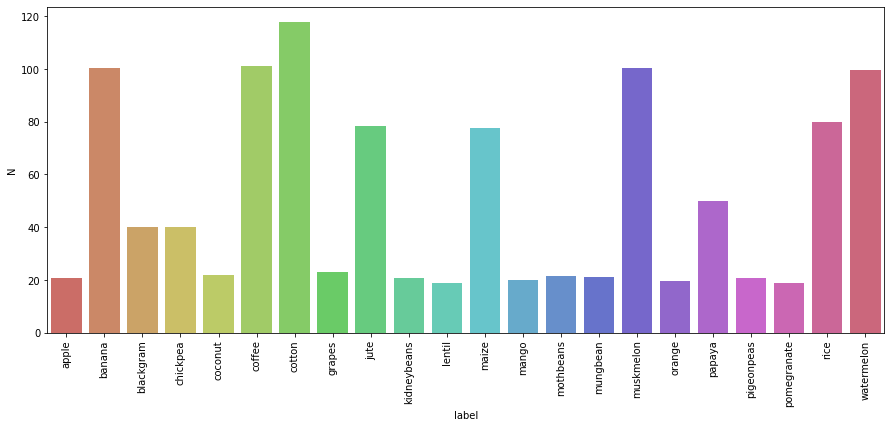

In [64]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'N', x='label', dp=crop_summary_new, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [65]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

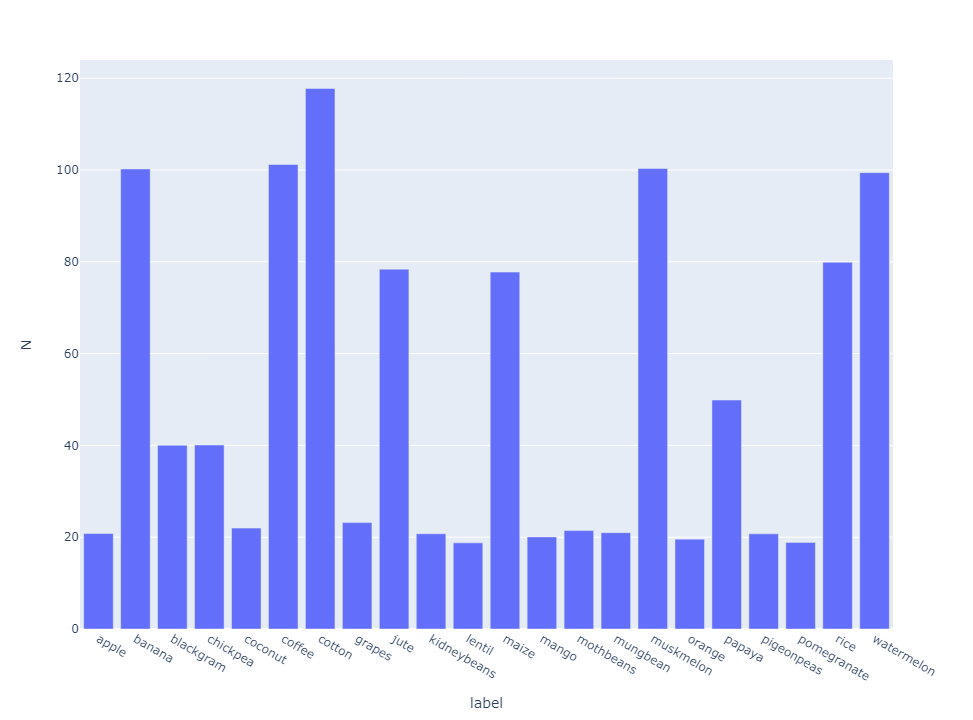

In [69]:
fig1 = px.bar(crop_summary_new, x='label', y='N')
fig1.show()

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
plt.figure(figsize=(15,6))
sns.barplot(y='P', x ='label', dp=crop_summary_new, palette = 'hls')
plt.xtricks(rotation = 90)
plt.show()

NameError: name 'crop_summary_new' is not defined

<Figure size 1080x432 with 0 Axes>

In [ ]:
fig2 =  pd.bar(crop_summary_new, x='label', y='P')
fig2.show()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
plt.figure(figsize=(15,6))
sns.barplot(y='K', x ='label', dp=crop_summary_new, palette = 'hls')
plt.xtricks(rotation = 90)
plt.show()

In [40]:
fig3 =  px.bar(crop_summary_new, x='label', y='K')
fig3.show()

NameError: name 'px' is not defined

In [41]:
import random

In [42]:
crop_summary_N = crop_summary.sort_values(by='N',ascending=False)

fig = make_subplots(row=1, cols=2)

top = {
    'Y' : crop_summary_N['N'][0:10].sort_values().index,
    'X' : crop_summary_N['N'][-10:]
}

last = {
    'Y' : crop_summary_N['N'][-10:].index,
    'X' : crop_summary_N['N'][-10:]
}
fig.add_trace(
    go.bar(top,
           name="Most nitrogen required",
           marker_color=random.choice(coloarr).
           orientation = 'h',
           text=top['x']),
    
    row=1 col=1
    
    }
    
    fig.addd_trace(
        go.Bar(last,
               name"Least nitrogen required",
               marker_color=random.choice(coloarr).
               orientation=['h'],
               text=last[,x]
               text=last['x']),
        row=1,col=2
    )
    fig.update_traces(texttemplate='%{text}', textpoaition=inside')
                      fig.update_layout(title_text="Nitrogen(N)",
                                        plot_bgcolor='white',
                                        font_size=7,
                                        font_color='black',
                                        geight=500)
                      fig.update_xaves(showgrid=Flase)
                      fig.update_yaxes(showgrid=Flase)
                      fig.show()

SyntaxError: invalid syntax (682482468.py, line 18)

In [43]:
crop_summary_P = crop_summary.sort_vales(by='P', ascending=False)
 fig = make_subplots(rows=1, cols=2)
    
 top = {
 'y' : crop_summary_P['P'][0:10].sort_values().index,
 'x' : crop_summary_P['p'][0:10].sort_values()
 }
 last = {
 'y' : crop_summary_P['P'][-10].index,
 'x' : crop_summary_P['P'][-10:]
 }
 fig.addd_trace(
 go.Bar(top,
 name="Most phosphorus required",
 marker_color=random.choice(colorarr),
 orientation='h',
 text=top['x']),
 
 ),
 row=1, col=1
 )
 
 fig.add_trace(
 go.Bar(last,
 name="Lease phpsporus required",
 marker_color=random.choice(colarr),
 orientation='h',text=last[,x]
 ),
 row=1, col=2
 )
 fig.update_traces(texttemplate='%{text}', textposition='inside')
 fig.update_layout(title_text="Phoaporus (P)",
 plot_bgcolor='white',
 font_size=7,
 font_color='black',
 height=500)
 
 fig.update_xaves(showgrid=False)
 fig.update_yaves(showgrid=False)
 fig.show()

IndentationError: unexpected indent (365630423.py, line 2)

In [45]:
crop_summary_P = crop_summary.sort_vales(by='K', ascending=False)
 
fig = make_subplots(rows=1, cols=2)
    
  top = {
       'y' : crop_summary_K['K'][0:10].sort_values().index,
     'x' : crop_summary_K['K'][0:10].sort_values()
 }
  last = {
      
 'y' : crop_summary_K['K'][-10].index,
 'x' : crop_summary_K['K'][-10:]
 }
    fig.add_trace(
 go.Bar(top,
 name="Most phosphorus required",
 marker_color=random.choice(colorarr),
 orientation='h',
 text=top['x']),
 
 ),
 row=1, col=1
 )
 
 fig.add_trace(
 go.Bar(last,
 name="Lease phpsporus required",
 marker_color=random.choice(colarr),
 orientation='h',text=last[,x]
 ),
 row=1, col=2
 )
 fig.update_traces(texttemplate='%{text}', textposition='inside')
 fig.update_layout(title_text="Phoaporus (K)",
 plot_bgcolor='white',
 font_size=7,
 font_color='black',
 height=500)
 
 fig.update_xaves(showgrid=False)
 fig.update_yaves(showgrid=False)
 fig.show()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 22)

/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figur

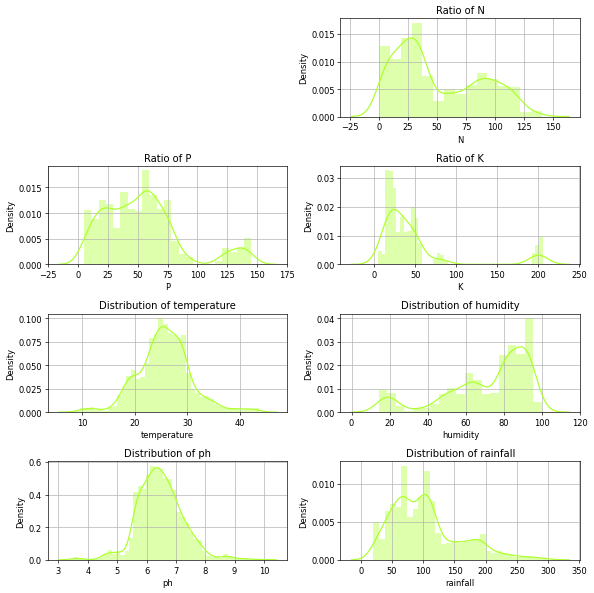

In [46]:
import pandas as pd
dp=pd.read_csv("archive.zip")
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['figure.dpi'] = 60
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for i, feat in enumerate(features): 
    plt.subplot(4, 2, i+2)
    sns.distplot(dp[feat],color='greenyellow')
    if i<3:
        plt.title(f'Ratio of {feat}', fontsize=12)
    else:
        plt.title(f'Distribution of {feat}', fontsize=12)
    plt.tight_layout()
    plt.grid()

In [ ]:
import pandas as pd
dp=pd.read_csv("archive.zip")
import seaborn as sns
sns.pairplot( dp, hue="label")